### Indians Diabetes Database

***About Dataset***

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

***Content***

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

***Inspiration***

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [6]:
df=pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

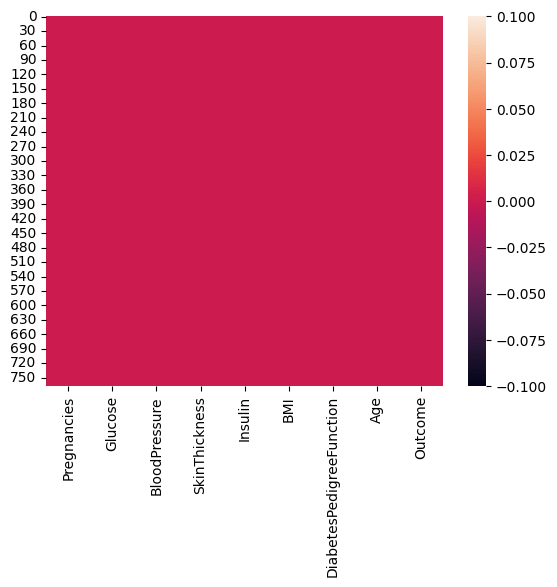

In [13]:
sns.heatmap(df.isnull())

we can see there few data for columns Glucose,Inslin,skin thickness,BMI and blood pressure which have value as 0.That's not possible,right? you can do a quck search to see that one cannote have 0 values for thses.Let's deal with that.we can either remove such data or simply replace it with respective mean values .Let's do the latter

In [14]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [15]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

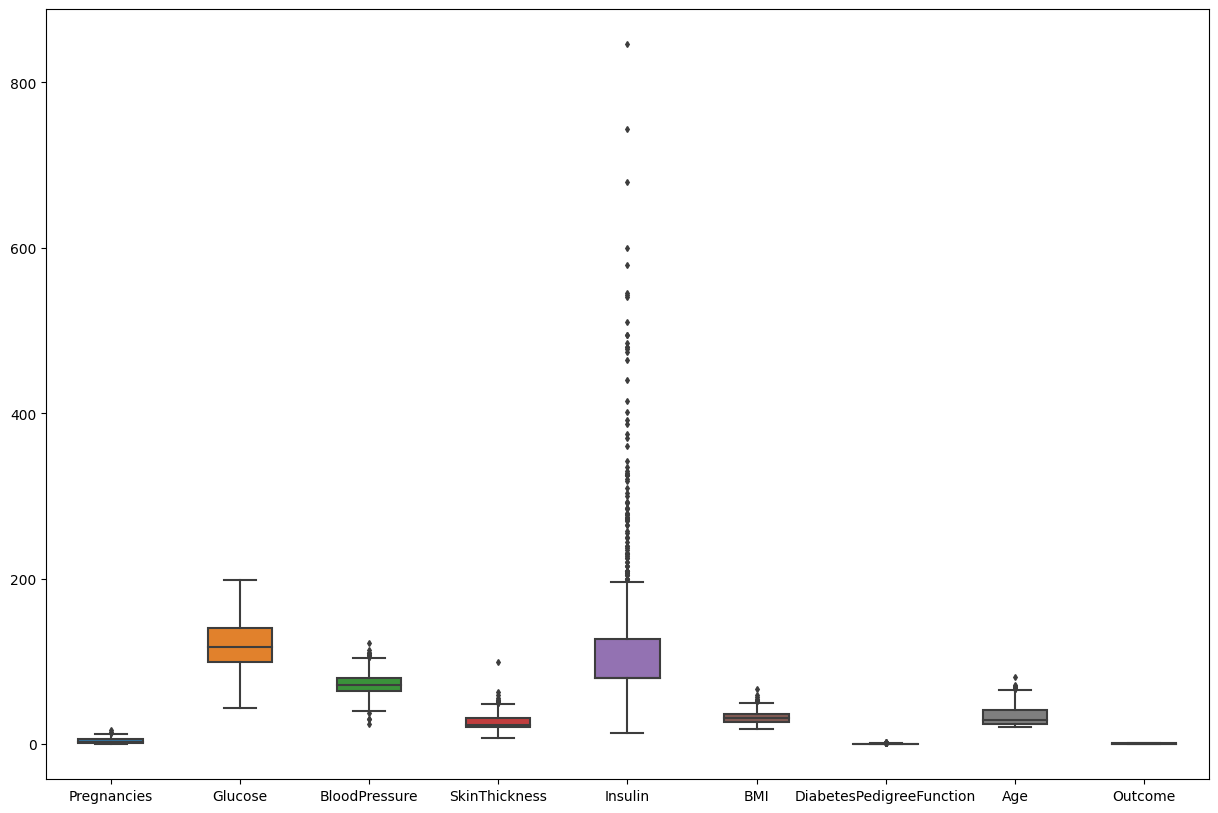

In [18]:
# now we have dealt with the value0 and data look better , but there still are outliers
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax,fliersize=3,width=0.5)

In [19]:
 df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


***segregate*** THe dependent and independent variable

In [20]:
X=df.drop(columns=["Outcome"])
y=df['Outcome']

In [21]:
X,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
 0              6    148.0           72.0      35.000000   79.799479  33.6   
 1              1     85.0           66.0      29.000000   79.799479  26.6   
 2              8    183.0           64.0      20.536458   79.799479  23.3   
 3              1     89.0           66.0      23.000000   94.000000  28.1   
 4              0    137.0           40.0      35.000000  168.000000  43.1   
 ..           ...      ...            ...            ...         ...   ...   
 763           10    101.0           76.0      48.000000  180.000000  32.9   
 764            2    122.0           70.0      27.000000   79.799479  36.8   
 765            5    121.0           72.0      23.000000  112.000000  26.2   
 766            1    126.0           60.0      20.536458   79.799479  30.1   
 767            1     93.0           70.0      31.000000   79.799479  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                      

 ***seperate*** data into train and test

In [31]:

X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
X_train.shape,x_test.shape

((614, 8), (154, 8))

In [32]:
import pickle

**Standard Scaling - StandardScaler**

In [35]:
def scaler_standard(X_train,x_test):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(X_train)
    x_test_scaled=scaler.transform(x_test)

    # saving the model by using pickel
    # file=open("")
    #pickle.dump(scaler,file)
    #file.close

    return x_train_scaled,x_test_scaled

In [36]:
x_train_scaled,x_test_scaled= scaler_standard(X_train,x_test)

In [37]:
x_train_scaled,x_test_scaled

(array([[ 0.90832902,  0.93644016,  0.45816047, ...,  0.36864973,
          0.67740401,  1.69955804],
        [ 0.03644676, -0.81628595, -1.03864035, ..., -0.63292879,
         -0.07049698, -0.96569189],
        [-1.12606292,  1.43249471,  1.45602768, ...,  2.81536295,
         -0.11855487, -0.88240283],
        ...,
        [ 0.03644676, -0.91549686, -0.62286235, ..., -1.13371805,
         -0.95656442, -1.04898095],
        [ 2.0708387 , -1.2131296 ,  0.12553806, ..., -0.36107176,
         -0.50001442,  0.11706589],
        [ 0.32707418,  0.4734559 ,  0.79078287, ..., -0.09027668,
          0.52121586,  2.94889395]]),
 array([[-0.8354355 ,  2.55688505,  0.29184926, ...,  1.47038609,
          2.78594417, -0.96569189],
        [-0.54480808, -0.48558291,  0.12553806, ...,  0.13971749,
         -0.1876381 , -0.88240283],
        [ 0.03644676, -1.51076233, -0.87232915, ...,  0.19695055,
         -0.22668514, -0.71582471],
        ...,
        [ 0.03644676,  0.67187772,  1.12340527, ...,  

<Axes: >

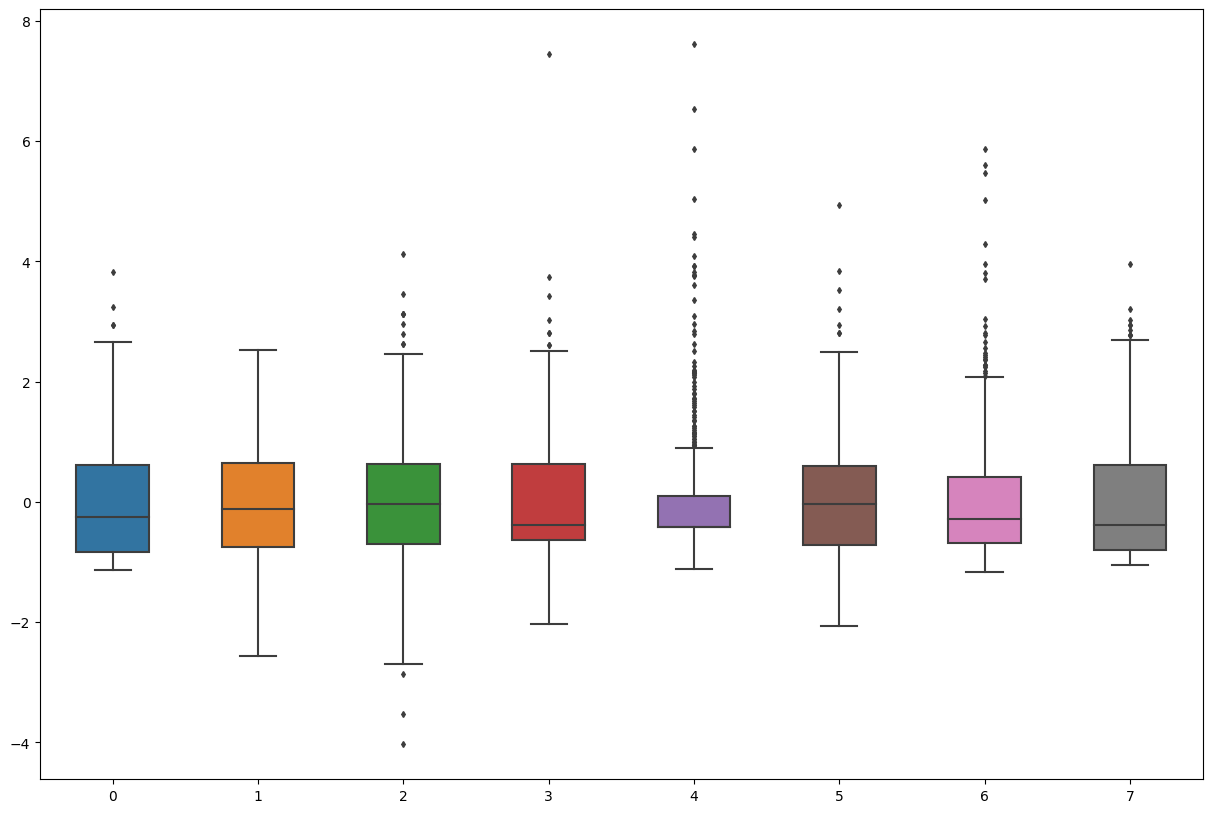

In [38]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=x_train_scaled,ax=ax,fliersize=3,width=0.5)

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [54]:
### Hyperparameter Tuning
## GridSearch CV

from sklearn.model_selection import GridSearchCV

parameter={
    'penalty':['l1','l2'],
    'C':np.logspace(-3,3,7),
    'solver':['newton-cg', 'lbfgs','liblinear']
}



/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [56]:
logreg=LogisticRegression()
clf=GridSearchCV(logreg,param_grid=parameter,scoring='accuracy',cv=10)
clf.fit(x_train_scaled,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [57]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [58]:
clf.best_score_

0.7605235325224748

In [59]:
 y_pred=clf.predict(x_test_scaled)

In [60]:
confusion_matrix(y_test,y_pred)

array([[95, 12],
       [21, 26]])

In [67]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
f1_score(y_test,y_pred)

0.611764705882353

In [64]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[95, 12],
       [21, 26]])

In [73]:
true_positive=conf_matrix[0][0]
false_positive=conf_matrix[0][1]
false_negative=conf_matrix[1][0]
false_negative=conf_matrix[1][1]

In [74]:
Accuracy=(true_positive + true_negative)/(true_positive + false_positive+false_negative+false_negative)
Accuracy

0.7610062893081762

In [76]:
accuracy_score(y_test,y_pred)

0.7857142857142857

In [80]:
Precision =true_positive/(true_positive+false_positive)
Precision

0.8878504672897196

In [81]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.7851239669421488

In [82]:
F1_score=2*(Recall * Precision)/(Recall + Precision)
F1_score


0.8333333333333334